In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from datetime import datetime

### Importing the data

In [34]:
dataset = pd.read_csv("dataset/movies.csv")
dataset

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


### Data Cleaning

In [4]:
dataset.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [5]:
dataset.dropna(inplace = True)

In [6]:
dataset.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

### Data Analysis

#### 1)To find the count of movies released based on year

In [7]:
years = dataset.groupby('year')['name'].count()
yearsDF = pd.DataFrame(years)
yearsDF.columns = ['count']
yearsDF

,count
year,
1980,40
1981,63
1982,71
1983,83
1984,88
1985,95
1986,99
1987,104
1988,130


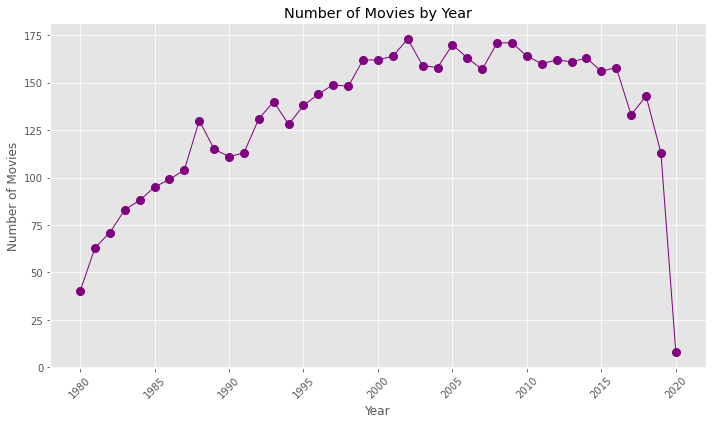

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(yearsDF.index, yearsDF['count'], marker='o', color='purple', linestyle='-', linewidth=1, markersize=8)
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Year')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True)  # Add gridlines for better readability
plt.tight_layout()  # Adjust layout to prevent cutting off labels
plt.show()

#### 2) To find the rating trend based on the year

In [9]:
ratings = dataset['rating'].value_counts()
ratingsDF = pd.DataFrame(ratings)
ratingsDF.columns = ['count']
ratingsDF

,count
R,2597
PG-13,1729
PG,907
G,111
Not Rated,44
Unrated,17
NC-17,12
TV-MA,2
Approved,1
X,1


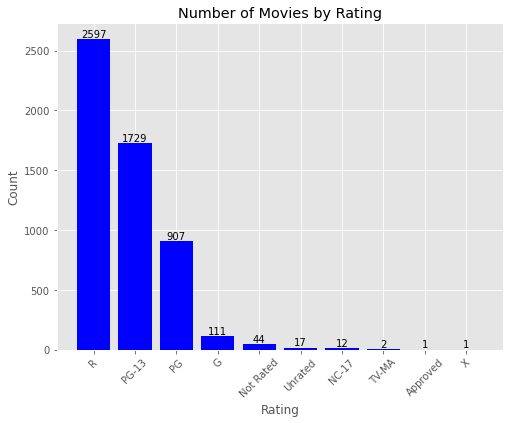

In [10]:
plt.figure(figsize=(8, 6))
bars = plt.bar(ratingsDF.index, ratingsDF['count'], color='blue')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Number of Movies by Rating')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Adding labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()

#### 3) Which movie made the highest gross and in which year

In [11]:
max_gross_row = dataset.loc[dataset['gross'].idxmax()]
highgross = max_gross_row['gross']
movie_name = max_gross_row['name']
release_year = max_gross_row['year']
print(highgross," ",movie_name," ",release_year)

2847246203.0   Avatar   2009


#### 4) To find top 20  companies who produced the highest films

In [40]:
company = dataset['company'].value_counts()
companyDF = pd.DataFrame(company)
companyDF.columns = ['count']
count = companyDF.head(20)
countDF = pd.DataFrame(count)
countDF

,count
Universal Pictures,377
Warner Bros.,334
Columbia Pictures,332
Paramount Pictures,320
Twentieth Century Fox,240
New Line Cinema,174
Touchstone Pictures,132
Metro-Goldwyn-Mayer (MGM),125
Walt Disney Pictures,123
TriStar Pictures,94


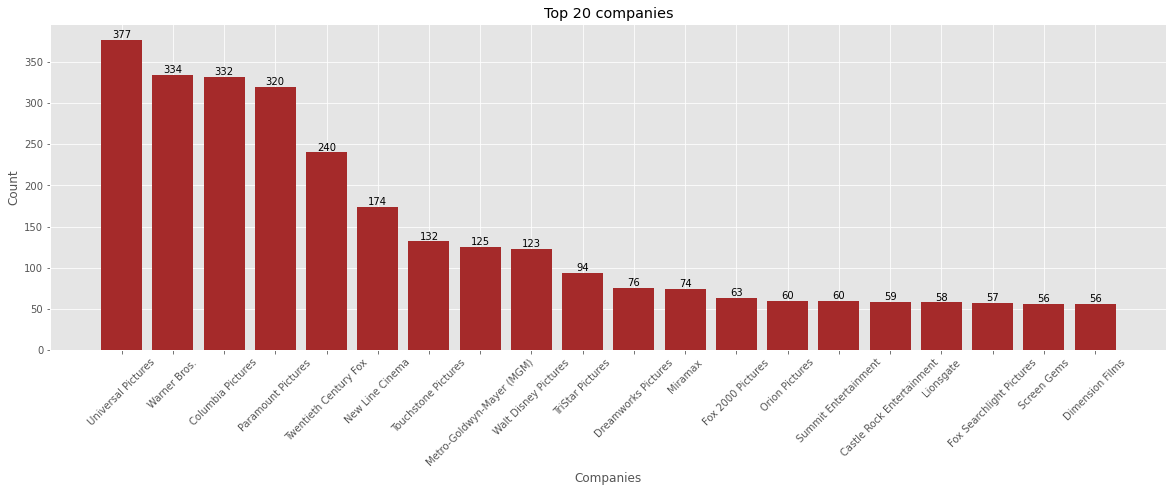

In [44]:
plt.figure(figsize=(20, 6))
bars = plt.bar(countDF.index, countDF['count'], color='brown')
plt.xlabel('Companies')
plt.ylabel('Count')
plt.title('Top 20 companies')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Adding labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()

#### Scatter plot with budget vs gross

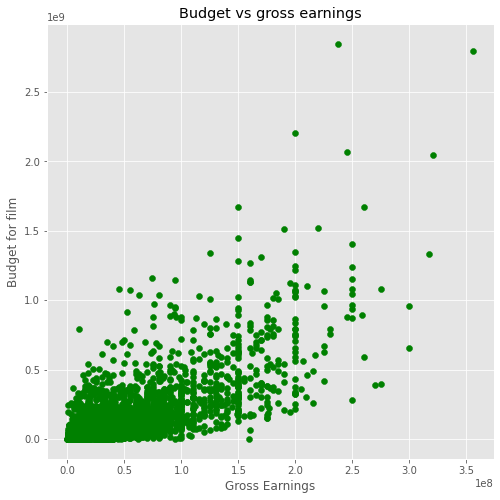

In [12]:
plt.figure(figsize=(8, 8))
plt.scatter(x = dataset['budget'],y = dataset['gross'],color = 'green',marker = 'o')
plt.title("Budget vs gross earnings")
plt.xlabel("Gross Earnings")
plt.ylabel("Budget for film")
plt.show()

#### Plot using seaborn

<AxesSubplot:xlabel='budget', ylabel='gross'>

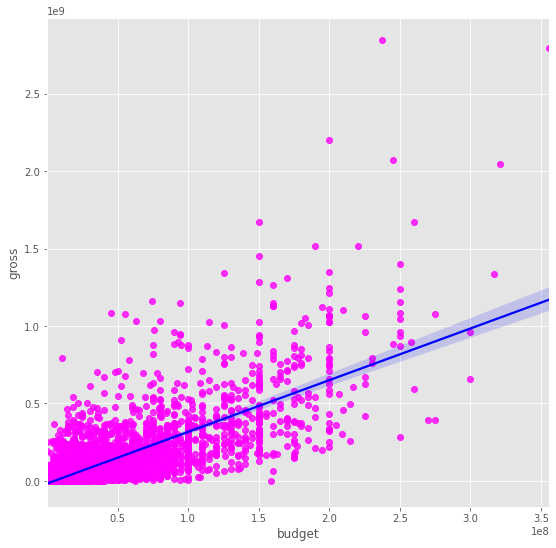

In [13]:
plt.figure(figsize=(9,9))
sns.regplot(x = 'budget',y='gross',data = dataset,scatter_kws={"color":"magenta"},line_kws = {"color":"blue"})

#### Genre distribution

In [14]:
genere = dataset['genre'].value_counts()
genereDF = pd.DataFrame(genere)
genereDF.columns = ['count']
genereDF

,count
Comedy,1496
Action,1415
Drama,863
Crime,399
Adventure,327
Biography,311
Animation,277
Horror,251
Fantasy,41
Mystery,17


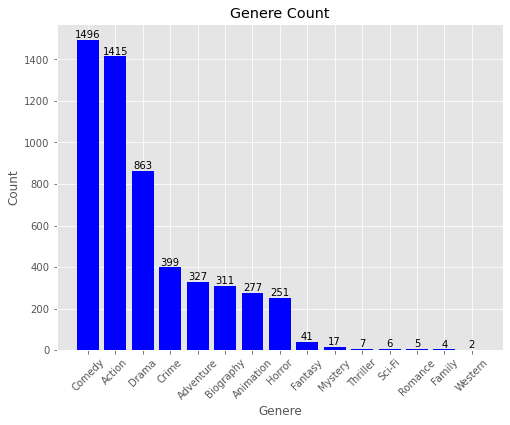

In [15]:
plt.figure(figsize=(8, 6))
bars = plt.bar(genereDF.index, genereDF['count'], color='blue')
plt.xlabel('Genere')
plt.ylabel('Count')
plt.title('Genere Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Adding labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()

#### To find the distribution of score

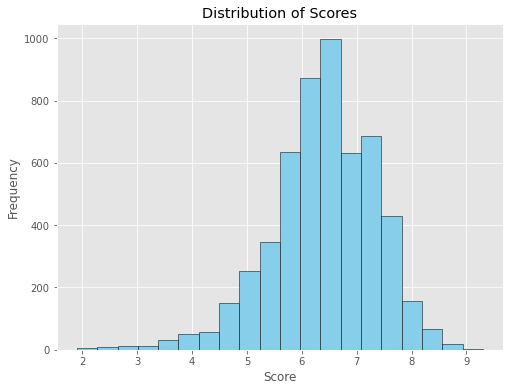

In [16]:
plt.figure(figsize=(8, 6))
plt.hist(dataset['score'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Scores')
plt.grid(True)  # Add gridlines for better readability
plt.show()

#### To find star distribution

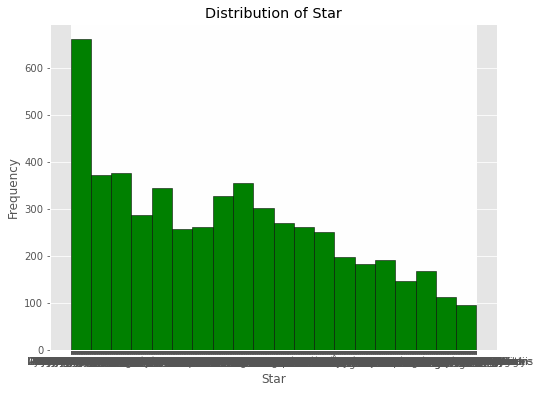

In [17]:
plt.figure(figsize=(8, 6))
plt.hist(dataset['star'], bins=20, color='green', edgecolor='black')
plt.xlabel('Star')
plt.ylabel('Frequency')
plt.title('Distribution of Star')
plt.grid(True)  # Add gridlines for better readability
plt.show()

#### Correlation

In [18]:
dataset.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


#### There is a high correlation between budget and gross

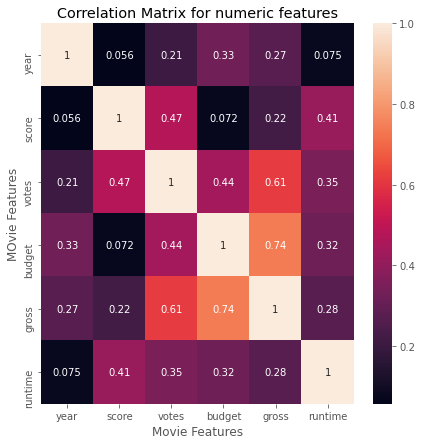

In [19]:
plt.figure(figsize=(7,7))
correlation_matrix = dataset.corr(method='pearson')
sns.heatmap(correlation_matrix,annot = True)
plt.title("Correlation Matrix for numeric features")
plt.xlabel("Movie Features")
plt.ylabel("MOvie Features")
plt.show()

#### Generate a clean csv file

In [46]:
dataset.to_csv('refined_movies.csv',index = False)